<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:center; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">Feature Engineering and Modelling</h1>

## Metric for this case

<img src="https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png" alt="Hotel Lobby" style="width:690px;height:345px;">

1. FP is a condition when the model predict THE CLIENTS/CUSTOMERS do subscribe the deposit (1), but actually they do not subscribe (0)
    - High number of FP would increase the marketing budget and would spend lot of time
    - The company's revenue will decrease due to lot of budget and time that they spend to call the False Positive Clients/Customer
    
    
2. FN is a condition when the model predict THE CLIENTS/CUSTOMERS do not subscribe the deposit (0), buat actually they subscibe (1)
    - High number of FN would make the company more missing the potential clients/customers.
    - The company;s revenue will might decrease due to missing the potential clients/customers prediction,

 
As I mentioned before in #1 notebook the main goal this project is making the campaign more efficient in terms of budget and time. So that in this case, we are going to use precision metric. Because we need to reduce the FP, a component that make budget and time are floating. So we focuss on Precision Score

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">1. Import Library</h1>

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

from sklearn.model_selection import learning_curve

from mlxtend.plotting import plot_learning_curves
from yellowbrick.model_selection import LearningCurve

from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


import pickle

import warnings


warnings.filterwarnings('ignore')

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">2. Preparing and Rechecking Data</h1>

In [165]:
df = pd.read_csv('campaign_clean.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [166]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'month',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'label'],
      dtype='object')

In [167]:
df.head(2)

,age,job,marital,education,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,label
0,56,housemaid,married,basic.4y,no,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,may,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [168]:
df.describe(include='object')

,job,marital,education,housing,loan,month,poutcome
count,38245,38245,38245,38245,38245,38245,38245
unique,11,3,7,2,2,10,3
top,admin.,married,university.degree,yes,no,may,nonexistent
freq,9937,23183,11821,20578,32286,12794,33066


In [169]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,label
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,2.566662,0.035717,0.170009,0.082861,93.570313,-40.541164,3.623298,5167.432566,0.111335
std,10.289488,2.767473,0.185586,0.487169,1.565945,0.576367,4.623200,1.730226,71.760333,0.314550
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,2.000000,0.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,3.000000,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,43.000000,1.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


## Dataset Splitting

In [170]:
X = df.drop('label', axis=1)
y = df['label']

In [171]:
df.nunique()

age                77
job                11
marital             3
education           7
housing             2
loan                2
month              10
campaign           41
pdays               2
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         314
nr.employed        11
label               2
dtype: int64

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=2020, test_size=.2)

In [173]:
num_trans = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

cat_trans = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_1 = ColumnTransformer(
    transformers=[
        ('num', num_trans,['emp.var.rate','euribor3m','nr.employed','cons.price.idx','cons.conf.idx','age', 'campaign', 'pdays', 'previous']),
        ('cat', cat_trans, ['marital','housing','loan', 'poutcome','job', 'education', 'month'])
    ])
     
preprocessor_2 = ColumnTransformer(
    transformers=[
         ('cat', cat_trans, ['marital','housing','loan', 'poutcome','job', 'education', 'month'])])

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">3. Default Model</h1>

In [174]:
logreg = Pipeline(steps=[('preprocessor_1', preprocessor_1),
                      ('logreg', LogisticRegression(random_state = 2020))])

knn = Pipeline(steps=[('preprocessor_1', preprocessor_1),
                      ('knn', KNeighborsClassifier())])

ranfor = Pipeline(steps=[('preprocessor_2', preprocessor_2),
                      ('ranfor', RandomForestClassifier(random_state = 2020))])

dtree = Pipeline(steps=[('preprocessor_2', preprocessor_2),
                      ('dtree', DecisionTreeClassifier(random_state = 2020))])

### Logistic Regression

In [175]:
metric = 'precision'
def model_evaluation_cv(logreg, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(logreg, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('Logreg CV Precision score',model_cv)
  print('Logreg CV Precision score mean',model_cv.mean())
  print('Logreg CV Precision score std',model_cv.std())

In [176]:
logreg_model_cv = model_evaluation_cv(logreg, metric)
print_result(logreg_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


Logreg CV Precision score [0.67821782 0.62612613 0.62173913 0.6        0.72596154]
Logreg CV Precision score mean 0.650408923360925
Logreg CV Precision score std 0.04568195114556049


In [177]:
logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_1',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housing', '

In [178]:
y_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      6797
           1       0.63      0.22      0.33       852

    accuracy                           0.90      7649
   macro avg       0.77      0.60      0.64      7649
weighted avg       0.88      0.90      0.88      7649



### KNearest Neighbors

In [179]:
metric = 'precision'
def model_evaluation_cv(knn, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(knn, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('KNN CV Precision score',model_cv)
  print('KNN CV Precision score mean',model_cv.mean())
  print('KNN CV Precision score std',model_cv.std())

In [180]:
knn_model_cv = model_evaluation_cv(knn, metric)
print_result(knn_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    9.3s remaining:   13.9s


KNN CV Precision score [0.54827586 0.47352025 0.54304636 0.50271739 0.53291536]
KNN CV Precision score mean 0.5200950441423917
KNN CV Precision score std 0.028129970283778016


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.7s finished


In [181]:
knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_1',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housing', '

In [182]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6797
           1       0.54      0.27      0.36       852

    accuracy                           0.89      7649
   macro avg       0.73      0.62      0.65      7649
weighted avg       0.87      0.89      0.88      7649



### Random Forest

In [183]:
metric = 'precision'
def model_evaluation_cv(ranfor, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(ranfor, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('Ranfor CV Precision score',model_cv)
  print('Ranfor CV Precision score mean',model_cv.mean())
  print('Ranfor CV Precision score std',model_cv.std())

In [184]:
ranfor_model_cv = model_evaluation_cv(ranfor, metric)
print_result(ranfor_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   26.6s remaining:   40.0s


Ranfor CV Precision score [0.51764706 0.51916376 0.51102941 0.47315436 0.56390977]
Ranfor CV Precision score mean 0.5169808741013269
Ranfor CV Precision score std 0.028857281657793495


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   27.1s finished


In [185]:
ranfor.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_2',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housing', 'loan',
                                                   'poutcome', 'job',
                                                   'education', 'month'])])),
                ('ranfor', RandomForestClassifier(random_state=2020))])

In [186]:
y_pred_ranfor = ranfor.predict(X_test)
print(classification_report(y_test, y_pred_ranfor))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6797
           1       0.50      0.21      0.29       852

    accuracy                           0.89      7649
   macro avg       0.71      0.59      0.62      7649
weighted avg       0.86      0.89      0.87      7649



### Decision Tree

In [187]:
metric = 'precision'
def model_evaluation_cv(dtree, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(dtree, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('DTree CV Precision score',model_cv)
  print('DTree CV Precision score mean',model_cv.mean())
  print('DTree CV Precision score std',model_cv.std())

In [188]:
dtree_model_cv = model_evaluation_cv(dtree, metric)
print_result(dtree_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


DTree CV Precision score [0.46969697 0.45555556 0.48708487 0.44557823 0.50187266]
DTree CV Precision score mean 0.47195765731395617
DTree CV Precision score std 0.020463399979226225


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


In [189]:
dtree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_2',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housing', 'loan',
                                                   'poutcome', 'job',
                                                   'education', 'month'])])),
                ('dtree', DecisionTreeClassifier(random_state=2020))])

In [190]:
y_pred_dtree = dtree.predict(X_test)
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6797
           1       0.48      0.19      0.27       852

    accuracy                           0.89      7649
   macro avg       0.69      0.58      0.60      7649
weighted avg       0.86      0.89      0.86      7649



In [191]:
cv_df = pd.DataFrame(data=[logreg_model_cv, knn_model_cv, ranfor_model_cv, dtree_model_cv], index = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree'])
cv_df = cv_df.transpose()
print("Cross Val Precision Score")
cv_df

Cross Val Precision Score


,Logistic Regression,KNN,Random Forest,Decision Tree
0,0.678218,0.548276,0.517647,0.469697
1,0.626126,0.473520,0.519164,0.455556
2,0.621739,0.543046,0.511029,0.487085
3,0.600000,0.502717,0.473154,0.445578
4,0.725962,0.532915,0.563910,0.501873


In [192]:
print("Cross Val Precision Score")
cv_df_t = cv_df.describe().loc[['mean','std']].transpose()
cv_df_t

Cross Val Precision Score


,mean,std
Logistic Regression,0.650409,0.051074
KNN,0.520095,0.031450
Random Forest,0.516981,0.032263
Decision Tree,0.471958,0.022879


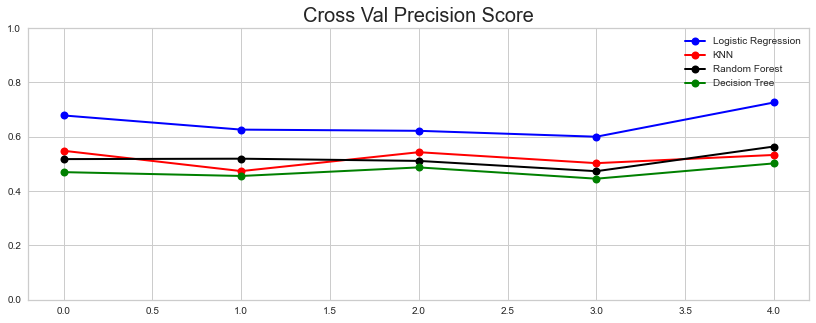

In [193]:
# multiple line plots
plt.figure(figsize=(14,5))
plt.plot( cv_df['Logistic Regression'], marker='o', markerfacecolor='blue', markersize=8, color='blue', linewidth=2)
plt.plot( cv_df['KNN'], marker='o', markerfacecolor='red', markersize=8, color='red', linewidth=2)
plt.plot( cv_df['Random Forest'], marker='o', markerfacecolor='black', markersize=8, color='black', linewidth=2)
plt.plot( cv_df['Decision Tree'], marker='o', markerfacecolor='green', markersize=8, color='green', linewidth=2)
# show legend
plt.title('Cross Val Precision Score', size=20)
plt.legend(['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree'])
plt.ylim(0,1)
# show graph
plt.show()

In [194]:
metric_default = pd.DataFrame(index = ['Logistic Regression','KNN', 'Random Forest','Decision Tree']) 
f1 = []
prec = []
recall = []
acc = []

In [195]:
def evaluationMetrics(y_test, y_pred):
    f1.append(f1_score(y_test,y_pred))
    prec.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    acc.append(accuracy_score(y_test, y_pred))

In [196]:
evaluationMetrics(y_test, y_pred_logreg)
evaluationMetrics(y_test, y_pred_knn)
evaluationMetrics(y_test, y_pred_ranfor)
evaluationMetrics(y_test, y_pred_dtree)

In [197]:
metric_default['F1-Score'] = f1
metric_default['Recall'] = recall
metric_default['Precision'] = prec
metric_default['Accuracy'] = acc

In [198]:
metric_default

,F1-Score,Recall,Precision,Accuracy
Logistic Regression,0.326389,0.220657,0.626667,0.898549
KNN,0.356358,0.266432,0.537915,0.892796
Random Forest,0.294020,0.207746,0.502841,0.888874
Decision Tree,0.271584,0.190141,0.475073,0.886390


## Insights
1. Based on those analysis, we can conclude that Logistic Regression has highest precision score relatively.

# 

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">4. Polynomial Model</h1>

In [199]:
num_scale_trans = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
])

num_poly_trans = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=3))])

cat_trans = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_1_poly = ColumnTransformer([
        ('num_scale_trans', num_scale_trans,['emp.var.rate','euribor3m','nr.employed','cons.price.idx','cons.conf.idx','age', 'campaign', 'pdays', 'previous']),
        ('num_poly_trans', num_poly_trans,['emp.var.rate','euribor3m','nr.employed','cons.price.idx','cons.conf.idx','age', 'campaign', 'pdays', 'previous']),
        ('cat', cat_trans, ['marital','housing','loan', 'poutcome','job', 'education', 'month'])
])
     
preprocessor_2_poly = ColumnTransformer([
        ('cat', cat_trans, ['marital','housing','loan', 'poutcome','job', 'education', 'month'])])

In [200]:
logreg_poly = Pipeline(steps=[('preprocessor_1_poly', preprocessor_1_poly),
                      ('logreg', LogisticRegression(random_state = 2020))])

knn_poly = Pipeline(steps=[('preprocessor_1_poly', preprocessor_1_poly),
                      ('knn', KNeighborsClassifier())])

ranfor_poly = Pipeline(steps=[('preprocessor_1_poly', preprocessor_1_poly),
                      ('ranfor', RandomForestClassifier(random_state = 2020))])

dtree_poly = Pipeline(steps=[('preprocessor_1_poly', preprocessor_1_poly),
                      ('dtree', DecisionTreeClassifier(random_state = 2020))])

### Logistic Regression Polynomial

In [201]:
metric = 'precision'
def model_evaluation_cv(logreg_poly, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(logreg_poly, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('Logreg CV Precision score',model_cv)
  print('Logreg CV Precision score mean',model_cv.mean())
  print('Logreg CV Precision score std',model_cv.std())

In [202]:
logreg_poly_model_cv = model_evaluation_cv(logreg_poly, metric)
print_result(logreg_poly_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Logreg CV Precision score [0.64705882 0.57142857 0.60264901 0.62921348 0.67164179]
Logreg CV Precision score mean 0.6243983351542687
Logreg CV Precision score std 0.03477774193014702


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.7s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished


In [203]:
logreg_poly.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_1_poly',
                 ColumnTransformer(transformers=[('num_scale_trans',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('num_poly_trans',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['emp.va

In [204]:
y_pred_logreg_poly = logreg_poly.predict(X_test)
print(classification_report(y_test, y_pred_logreg_poly))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6797
           1       0.68      0.09      0.16       852

    accuracy                           0.89      7649
   macro avg       0.79      0.54      0.55      7649
weighted avg       0.87      0.89      0.86      7649



### KNearest Neighbors

In [205]:
metric = 'precision'
def model_evaluation_cv(knn_poly, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(knn_poly, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('KNN Poly CV Precision score',model_cv)
  print('KNN Poly CV Precision score mean',model_cv.mean())
  print('KNN Poly CV Precision score std',model_cv.std())

In [206]:
knn_poly_model_cv = model_evaluation_cv(knn_poly, metric)
print_result(knn_poly_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.7s remaining:   20.6s


KNN Poly CV Precision score [0.49848943 0.47647059 0.5        0.46802326 0.50581395]
KNN Poly CV Precision score mean 0.48975944470389854
KNN Poly CV Precision score std 0.014750487530245082


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.4s finished


In [207]:
knn_poly.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_1_poly',
                 ColumnTransformer(transformers=[('num_scale_trans',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('num_poly_trans',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['emp.va

In [208]:
y_pred_knn_poly = knn_poly.predict(X_test)
print(classification_report(y_test, y_pred_knn_poly))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6797
           1       0.52      0.26      0.35       852

    accuracy                           0.89      7649
   macro avg       0.71      0.62      0.64      7649
weighted avg       0.87      0.89      0.87      7649



### Random Forest

In [209]:
metric = 'precision'
def model_evaluation_cv(ranfor_poly, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(ranfor_poly, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('Ranfor Poly CV Precision score',model_cv)
  print('Ranfor Poly CV Precision score mean',model_cv.mean())
  print('Ranfor Poly CV Precision score std',model_cv.std())

In [210]:
ranfor_poly_model_cv = model_evaluation_cv(ranfor_poly, metric)
print_result(ranfor_poly_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.7s remaining:   32.6s


Ranfor Poly CV Precision score [0.50520833 0.4187643  0.50724638 0.4562212  0.44880174]
Ranfor Poly CV Precision score mean 0.46724839065609924
Ranfor Poly CV Precision score std 0.034215145122412485


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.1s finished


In [211]:
ranfor_poly.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_1_poly',
                 ColumnTransformer(transformers=[('num_scale_trans',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('num_poly_trans',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['emp.va

In [212]:
y_pred_ranfor_poly = ranfor_poly.predict(X_test)
print(classification_report(y_test, y_pred_ranfor_poly))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6797
           1       0.47      0.30      0.36       852

    accuracy                           0.88      7649
   macro avg       0.69      0.63      0.65      7649
weighted avg       0.87      0.88      0.87      7649



### Decision Tree

In [213]:
metric = 'precision'
def model_evaluation_cv(dtree_poly, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(dtree_poly, X_train, y_train, cv = skfold, scoring = metric)
  return model_cv

def print_result(model_cv):
  print('DTree Poly CV Precision score',model_cv)
  print('DTree Poly CV Precision score mean',model_cv.mean())
  print('DTree Poly CV Precision score std',model_cv.std())

In [214]:
dtree_poly_model_cv = model_evaluation_cv(dtree_poly, metric)
print_result(dtree_poly_model_cv)

DTree Poly CV Precision score [0.29737609 0.29071332 0.29801325 0.2957359  0.29058663]
DTree Poly CV Precision score mean 0.29448503878752563
DTree Poly CV Precision score std 0.003218524824002314


In [215]:
dtree_poly.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_1_poly',
                 ColumnTransformer(transformers=[('num_scale_trans',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('num_poly_trans',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=3))]),
                                                  ['emp.va

In [216]:
y_pred_dtree_poly = dtree_poly.predict(X_test)
print(classification_report(y_test, y_pred_dtree_poly))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      6797
           1       0.32      0.33      0.32       852

    accuracy                           0.85      7649
   macro avg       0.62      0.62      0.62      7649
weighted avg       0.85      0.85      0.85      7649



In [217]:
poly_cv_df = pd.DataFrame(data=[logreg_poly_model_cv, knn_poly_model_cv, ranfor_poly_model_cv, dtree_poly_model_cv], index = ['Poly Logistic Regression', 'Poly KNN', 'Poly Random Forest', 'Poly Decision Tree'])
poly_cv_df = poly_cv_df.transpose()
print("Poly Cross Val Precision Score")
poly_cv_df

Poly Cross Val Precision Score


,Poly Logistic Regression,Poly KNN,Poly Random Forest,Poly Decision Tree
0,0.647059,0.498489,0.505208,0.297376
1,0.571429,0.476471,0.418764,0.290713
2,0.602649,0.500000,0.507246,0.298013
3,0.629213,0.468023,0.456221,0.295736
4,0.671642,0.505814,0.448802,0.290587


In [218]:
print("Cross Val Precision Score")
poly_cv_df_t = poly_cv_df.describe().loc[['mean','std']].transpose()
poly_cv_df_t

Cross Val Precision Score


,mean,std
Poly Logistic Regression,0.624398,0.038883
Poly KNN,0.489759,0.016492
Poly Random Forest,0.467248,0.038254
Poly Decision Tree,0.294485,0.003598


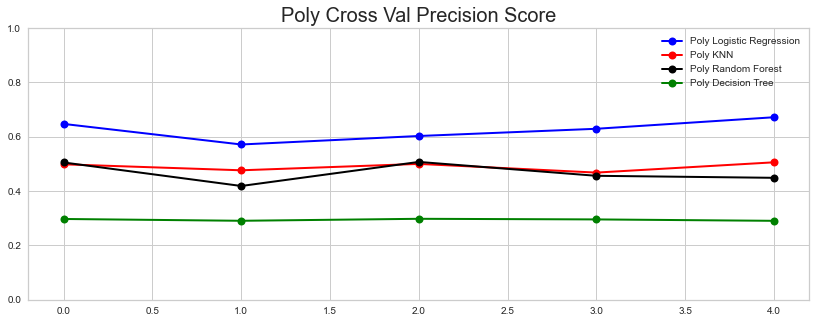

In [219]:
# multiple line plots
plt.figure(figsize=(14,5))
plt.plot( poly_cv_df['Poly Logistic Regression'], marker='o', markerfacecolor='blue', markersize=8, color='blue', linewidth=2)
plt.plot( poly_cv_df['Poly KNN'], marker='o', markerfacecolor='red', markersize=8, color='red', linewidth=2)
plt.plot( poly_cv_df['Poly Random Forest'], marker='o', markerfacecolor='black', markersize=8, color='black', linewidth=2)
plt.plot( poly_cv_df['Poly Decision Tree'], marker='o', markerfacecolor='green', markersize=8, color='green', linewidth=2)
# show legend
plt.title('Poly Cross Val Precision Score', size=20)
plt.legend(['Poly Logistic Regression', 'Poly KNN', 'Poly Random Forest', 'Poly Decision Tree'])
plt.ylim(0,1)
# show graph
plt.show()

In [220]:
metric_poly = pd.DataFrame(index = ['Poly Logistic Regression','Poly KNN', 'Poly Random Forest','Poly Decision Tree']) 
f1 = []
prec = []
recall = []
acc = []

In [221]:
def evaluationMetrics(y_test, y_pred_poly):
    f1.append(f1_score(y_test,y_pred_poly))
    prec.append(precision_score(y_test, y_pred_poly))
    recall.append(recall_score(y_test, y_pred_poly))
    acc.append(accuracy_score(y_test, y_pred_poly))

In [222]:
evaluationMetrics(y_test, y_pred_logreg_poly)
evaluationMetrics(y_test, y_pred_knn_poly)
evaluationMetrics(y_test, y_pred_ranfor_poly)
evaluationMetrics(y_test, y_pred_dtree_poly)

In [223]:
metric_poly['F1-Score'] = f1
metric_poly['Recall'] = recall
metric_poly['Precision'] = prec
metric_poly['Accuracy'] = acc

In [224]:
metric_poly

,F1-Score,Recall,Precision,Accuracy
Poly Logistic Regression,0.164948,0.093897,0.677966,0.894104
Poly KNN,0.347082,0.261737,0.515012,0.890312
Poly Random Forest,0.364029,0.296948,0.470260,0.884429
Poly Decision Tree,0.323032,0.325117,0.320973,0.848215


## Insights
1. Polynomial increase the precision score for Logistic Regression and KNN
2. Polynomial decrease the precision score for Random Forest and Decision Tree

# 

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">5. Resampling Model (SMOTE)</h1>

## Resampling Model Evaluation

1. We have an issue with data imbalanced
2. We use SMOTE, RUS, and Nearmiss method to overcome the imbalance data
3. Synthetic Minority Oversampling Technique (SMOTE) , duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples

## SMOTE

In [225]:
smote = SMOTE()

In [226]:
logreg_smote = Pipeline(steps=[('preprocessor_1', preprocessor_1),
                               ('balancing', smote),
                               ('logreg', LogisticRegression(random_state = 2020))])

knn_smote = Pipeline(steps=[('preprocessor_1', preprocessor_1),
                               ('balancing', smote),
                               ('knn', KNeighborsClassifier())])

ranfor_smote = Pipeline(steps=[('preprocessor_2', preprocessor_2),
                               ('balancing', smote),
                               ('ranfor', RandomForestClassifier(random_state = 2020))])

dtree_smote = Pipeline(steps=[('preprocessor_2', preprocessor_2),
                              ('balancing', smote),
                              ('dtree', DecisionTreeClassifier(random_state = 2020))])

### Logistic Regression

In [227]:
metric = 'precision'
def model_evaluation_cv(logreg_smote, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(logreg_smote, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('Logreg SMOTE CV Precision score',model_cv)
  print('Logreg SMOTE CV Precision score mean',model_cv.mean())
  print('Logreg SMOTE CV Precision score std',model_cv.std())

In [228]:
logreg_smote_model_cv = model_evaluation_cv(logreg_smote, metric)
print_result(logreg_smote_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.9s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


Logreg SMOTE CV Precision score [0.3376729  0.31848552 0.33626902 0.30035842 0.33711262]
Logreg SMOTE CV Precision score mean 0.3259796978328196
Logreg SMOTE CV Precision score std 0.014691191497496528


In [229]:
logreg_smote.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_1',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housing', '

In [230]:
y_pred_logreg_smote = logreg_smote.predict(X_test)
print(classification_report(y_test, y_pred_logreg_smote))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      6797
           1       0.35      0.64      0.45       852

    accuracy                           0.83      7649
   macro avg       0.65      0.75      0.68      7649
weighted avg       0.88      0.83      0.85      7649



### KNN

In [231]:
metric = 'precision'
def model_evaluation_cv(knn_smote, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(knn_smote, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('KNN SMOTE CV Precision score',model_cv)
  print('KNN SMOTE CV Precision score mean',model_cv.mean())
  print('KNN SMOTE CV Precision score std',model_cv.std())

In [232]:
knn_smote_model_cv = model_evaluation_cv(knn_smote, metric)
print_result(knn_smote_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   15.6s remaining:   23.5s


KNN SMOTE CV Precision score [0.25052338 0.24552957 0.251235   0.24656638 0.2452334 ]
KNN SMOTE CV Precision score mean 0.24781754739698392
KNN SMOTE CV Precision score std 0.0025486695152911317


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.1s finished


In [233]:
knn_smote.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_1',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housing', '

In [234]:
y_pred_knn_smote = knn_smote.predict(X_test)
print(classification_report(y_test, y_pred_knn_smote))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      6797
           1       0.26      0.56      0.36       852

    accuracy                           0.77      7649
   macro avg       0.60      0.68      0.61      7649
weighted avg       0.86      0.77      0.81      7649



### Random Forest

In [235]:
metric = 'precision'
def model_evaluation_cv(ranfor_smote, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(ranfor_smote, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('Ranfor SMOTE CV Precision score',model_cv)
  print('Ranfor SMOTE CV Precision score mean',model_cv.mean())
  print('Ranfor SMOTE CV Precision score std',model_cv.std())

In [236]:
ranfor_smote_model_cv = model_evaluation_cv(ranfor_smote, metric)
print_result(ranfor_smote_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.1min remaining:  1.6min


Ranfor SMOTE CV Precision score [0.28851541 0.27403846 0.28920308 0.30131004 0.32711621]
Ranfor SMOTE CV Precision score mean 0.29603664170810956
Ranfor SMOTE CV Precision score std 0.01778164724249782


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


In [237]:
ranfor_smote.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_2',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housing', 'loan',
                                                   'poutcome', 'job',
                                                   'education', 'month'])])),
                ('balancing', SMOTE()),
                ('ranfor', RandomForestClassifier(random_state=2020))])

In [238]:
y_pred_ranfor_smote = ranfor_smote.predict(X_test)
print(classification_report(y_test, y_pred_ranfor_smote))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      6797
           1       0.33      0.34      0.33       852

    accuracy                           0.85      7649
   macro avg       0.62      0.62      0.62      7649
weighted avg       0.85      0.85      0.85      7649



### Decision Tree

In [239]:
metric = 'precision'
def model_evaluation_cv(dtree_smote, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(dtree_smote, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('DTree SMOTE CV Precision score',model_cv)
  print('DTree SMOTE CV Precision score mean',model_cv.mean())
  print('DTree SMOTE CV Precision score std',model_cv.std())

In [240]:
dtree_smote_model_cv = model_evaluation_cv(dtree_smote, metric)
print_result(dtree_smote_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished


DTree SMOTE CV Precision score [0.29583975 0.26459144 0.3171521  0.27424242 0.28216374]
DTree SMOTE CV Precision score mean 0.2867978927295883
DTree SMOTE CV Precision score std 0.018305054235916222


In [241]:
dtree_smote.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_2',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housing', 'loan',
                                                   'poutcome', 'job',
                                                   'education', 'month'])])),
                ('balancing', SMOTE()),
                ('dtree', DecisionTreeClassifier(random_state=2020))])

In [242]:
y_pred_dtree_smote = dtree_smote.predict(X_test)
print(classification_report(y_test, y_pred_dtree_smote))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6797
           1       0.28      0.29      0.28       852

    accuracy                           0.84      7649
   macro avg       0.59      0.60      0.59      7649
weighted avg       0.84      0.84      0.84      7649



In [246]:
cv_smote_df = pd.DataFrame(data=[logreg_smote_model_cv, knn_smote_model_cv, ranfor_smote_model_cv, dtree_smote_model_cv], index = ['SMOTE Logistic Regression', 'SMOTE KNN', 'SMOTE Random Forest', 'SMOTE Decision Tree'])
cv_smote_df = cv_smote_df.transpose()
print("SMOTE Cross Val Precision Score")
cv_smote_df

SMOTE Cross Val Precision Score


,SMOTE Logistic Regression,SMOTE KNN,SMOTE Random Forest,SMOTE Decision Tree
0,0.337673,0.250523,0.288515,0.295840
1,0.318486,0.245530,0.274038,0.264591
2,0.336269,0.251235,0.289203,0.317152
3,0.300358,0.246566,0.301310,0.274242
4,0.337113,0.245233,0.327116,0.282164


In [244]:
print("SMOTE Cross Val Precision Score")
cv_smote_df_t = cv_smote_df.describe().loc[['mean','std']].transpose()
cv_smote_df_t

SMOTE Cross Val Precision Score


,mean,std
SMOTE Logistic Regression,0.325980,0.016425
SMOTE KNN,0.247818,0.002849
SMOTE Random Forest,0.296037,0.019880
SMOTE Decision Tree,0.286798,0.020466


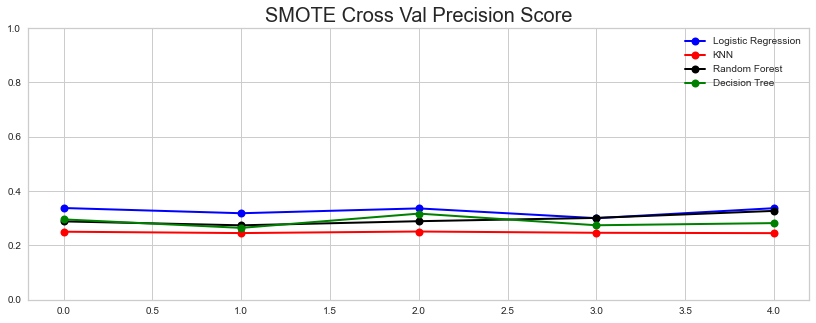

In [248]:
# multiple line plots
plt.figure(figsize=(14,5))
plt.plot( cv_smote_df['SMOTE Logistic Regression'], marker='o', markerfacecolor='blue', markersize=8, color='blue', linewidth=2)
plt.plot( cv_smote_df['SMOTE KNN'], marker='o', markerfacecolor='red', markersize=8, color='red', linewidth=2)
plt.plot( cv_smote_df['SMOTE Random Forest'], marker='o', markerfacecolor='black', markersize=8, color='black', linewidth=2)
plt.plot( cv_smote_df['SMOTE Decision Tree'], marker='o', markerfacecolor='green', markersize=8, color='green', linewidth=2)
# show legend
plt.title('SMOTE Cross Val Precision Score', size=20)
plt.legend(['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree'])
plt.ylim(0,1)
# show graph
plt.show()

In [249]:
metric_smote = pd.DataFrame(index = ['SMOTE Logistic Regression', 'SMOTE KNN',
                                             'SMOTE Random Forest',
                                             'SMOTE Decision Tree']) 
f1 = []
prec = []
recall = []
acc = []

In [250]:
def evaluationMetrics(y_test, y_pred):
    f1.append(f1_score(y_test,y_pred))
    prec.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    acc.append(accuracy_score(y_test, y_pred))

In [251]:
evaluationMetrics(y_test, y_pred_logreg_smote)
evaluationMetrics(y_test, y_pred_knn_smote)
evaluationMetrics(y_test, y_pred_ranfor_smote)
evaluationMetrics(y_test, y_pred_dtree_smote)

In [252]:
metric_smote['F1-Score'] = f1
metric_smote['Recall'] = recall
metric_smote['Precision'] = prec
metric_smote['Accuracy'] = acc

In [253]:
metric_smote

,F1-Score,Recall,Precision,Accuracy
SMOTE Logistic Regression,0.452579,0.638498,0.350515,0.827951
SMOTE KNN,0.357143,0.563380,0.261438,0.774088
SMOTE Random Forest,0.330636,0.335681,0.325740,0.848608
SMOTE Decision Tree,0.281933,0.287559,0.276524,0.836841


# 

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">6. Resampling Model (RUS)</h1>

In [254]:
rus = RandomUnderSampler()

In [255]:
logreg_rus = Pipeline(steps=[('preprocessor_1_poly', preprocessor_1),
                               ('balancing', rus),
                               ('logreg', LogisticRegression(random_state = 2020))])

knn_rus = Pipeline(steps=[('preprocessor_1_poly', preprocessor_1),
                               ('balancing', rus),
                               ('knn', KNeighborsClassifier())])

ranfor_rus = Pipeline(steps=[('preprocessor_2', preprocessor_2),
                               ('balancing', rus),
                               ('ranfor', RandomForestClassifier(random_state = 2020))])

dtree_rus = Pipeline(steps=[('preprocessor_2', preprocessor_2),
                              ('balancing', rus),
                              ('dtree', DecisionTreeClassifier(random_state = 2020))])

### Logistic Regression

In [256]:
metric = 'precision'
def model_evaluation_cv(logreg_rus, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(logreg_rus, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('Logreg RUS CV Precision score',model_cv)
  print('Logreg RUS CV Precision score mean',model_cv.mean())
  print('Logreg RUS CV Precision score std',model_cv.std())

In [257]:
logreg_rus_model_cv = model_evaluation_cv(logreg_rus, metric)
print_result(logreg_rus_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Logreg RUS CV Precision score [0.34223706 0.33568627 0.33877551 0.31264194 0.35760518]
Logreg RUS CV Precision score mean 0.3373891924805686
Logreg RUS CV Precision score std 0.014487486471761532


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.5s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


In [258]:
logreg_rus.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_1_poly',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housin

In [259]:
y_pred_logreg_rus = logreg_rus.predict(X_test)
print(classification_report(y_test, y_pred_logreg_rus))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6797
           1       0.36      0.63      0.45       852

    accuracy                           0.83      7649
   macro avg       0.65      0.74      0.68      7649
weighted avg       0.88      0.83      0.85      7649



### KNN

In [260]:
metric = 'precision'
def model_evaluation_cv(knn_rus_smote, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(knn_rus, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('KNN RUS CV Precision score',model_cv)
  print('KNN RUS CV Precision score mean',model_cv.mean())
  print('KNN RUS CV Precision score std',model_cv.std())

In [261]:
knn_rus_model_cv = model_evaluation_cv(knn_rus, metric)
print_result(knn_rus_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.8s


KNN RUS CV Precision score [0.23149606 0.22093023 0.22702991 0.23237885 0.22942387]
KNN RUS CV Precision score mean 0.22825178660369758
KNN RUS CV Precision score std 0.0040995102215007784


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished


In [262]:
knn_rus.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_1_poly',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housin

In [263]:
y_pred_knn_rus = knn_rus.predict(X_test)
print(classification_report(y_test, y_pred_knn_rus))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82      6797
           1       0.23      0.66      0.34       852

    accuracy                           0.71      7649
   macro avg       0.59      0.69      0.58      7649
weighted avg       0.86      0.71      0.76      7649



### Random Forest

In [264]:
metric = 'precision'
def model_evaluation_cv(ranfor_rus, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(ranfor_rus, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('Ranfor RUS CV Precision score',model_cv)
  print('Ranfor RUS CV Precision score mean',model_cv.mean())
  print('Ranfor RUS CV Precision score std',model_cv.std())

In [265]:
ranfor_rus_model_cv = model_evaluation_cv(ranfor_rus, metric)
print_result(ranfor_rus_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Ranfor RUS CV Precision score [0.1942446  0.19031477 0.20242302 0.20183955 0.21123717]
Ranfor RUS CV Precision score mean 0.20001182247993907
Ranfor RUS CV Precision score std 0.00724508792918025


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.9s remaining:    8.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.0s finished


In [266]:
ranfor_rus.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_2',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housing', 'loan',
                                                   'poutcome', 'job',
                                                   'education', 'month'])])),
                ('balancing', RandomUnderSampler()),
                ('ranfor', RandomForestClassifier(random_state=2020))])

In [267]:
y_pred_ranfor_rus = ranfor_rus.predict(X_test)
print(classification_report(y_test, y_pred_ranfor_rus))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      6797
           1       0.22      0.57      0.32       852

    accuracy                           0.73      7649
   macro avg       0.58      0.66      0.57      7649
weighted avg       0.85      0.73      0.77      7649



### Decision Tree

In [268]:
metric = 'precision'
def model_evaluation_cv(dtree_rus, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(dtree_rus, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('DTree RUS CV Precision score',model_cv)
  print('DTree RUS CV Precision score mean',model_cv.mean())
  print('DTree RUS CV Precision score std',model_cv.std())

In [269]:
dtree_rus_model_cv = model_evaluation_cv(dtree_rus, metric)
print_result(dtree_rus_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


DTree RUS CV Precision score [0.21643164 0.19037433 0.1946956  0.19822485 0.21587664]
DTree RUS CV Precision score mean 0.2031206124664196
DTree RUS CV Precision score std 0.010929928165751734


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [270]:
dtree_rus.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_2',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housing', 'loan',
                                                   'poutcome', 'job',
                                                   'education', 'month'])])),
                ('balancing', RandomUnderSampler()),
                ('dtree', DecisionTreeClassifier(random_state=2020))])

In [271]:
y_pred_dtree_rus = dtree_rus.predict(X_test)
print(classification_report(y_test, y_pred_dtree_rus))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      6797
           1       0.21      0.50      0.30       852

    accuracy                           0.74      7649
   macro avg       0.57      0.63      0.57      7649
weighted avg       0.85      0.74      0.78      7649



In [272]:
cv_rus_df = pd.DataFrame(data=[logreg_rus_model_cv, knn_rus_model_cv, ranfor_rus_model_cv, dtree_rus_model_cv], index = ['RUS Logistic Regression', 'RUS KNN', 'RUS Random Forest', 'RUS Decision Tree'])
cv_rus_df = cv_rus_df.transpose()
print("RUS Cross Val Precision Score")
cv_rus_df

RUS Cross Val Precision Score


,RUS Logistic Regression,RUS KNN,RUS Random Forest,RUS Decision Tree
0,0.342237,0.231496,0.194245,0.216432
1,0.335686,0.220930,0.190315,0.190374
2,0.338776,0.227030,0.202423,0.194696
3,0.312642,0.232379,0.201840,0.198225
4,0.357605,0.229424,0.211237,0.215877


In [273]:
print("RUS Cross Val Precision Score")
cv_rus_df_t = cv_rus_df.describe().loc[['mean','std']].transpose()
cv_rus_df_t

RUS Cross Val Precision Score


,mean,std
RUS Logistic Regression,0.337389,0.016198
RUS KNN,0.228252,0.004583
RUS Random Forest,0.200012,0.008100
RUS Decision Tree,0.203121,0.012220


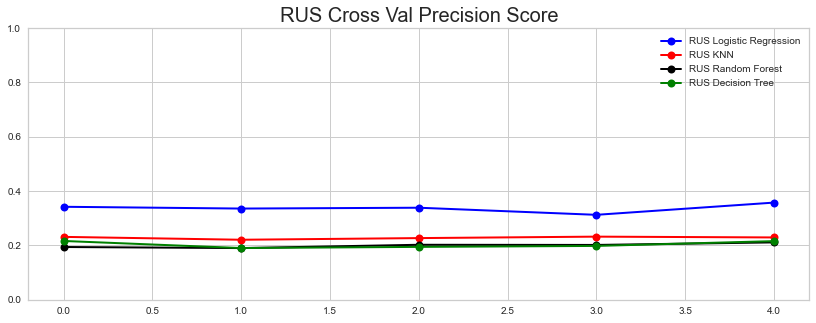

In [274]:
# multiple line plots
plt.figure(figsize=(14,5))
plt.plot( cv_rus_df['RUS Logistic Regression'], marker='o', markerfacecolor='blue', markersize=8, color='blue', linewidth=2)
plt.plot( cv_rus_df['RUS KNN'], marker='o', markerfacecolor='red', markersize=8, color='red', linewidth=2)
plt.plot( cv_rus_df['RUS Random Forest'], marker='o', markerfacecolor='black', markersize=8, color='black', linewidth=2)
plt.plot( cv_rus_df['RUS Decision Tree'], marker='o', markerfacecolor='green', markersize=8, color='green', linewidth=2)
# show legend
plt.title('RUS Cross Val Precision Score', size=20)
plt.legend(['RUS Logistic Regression', 'RUS KNN', 'RUS Random Forest', 'RUS Decision Tree'])
plt.ylim(0,1)
# show graph
plt.show()

In [275]:
metric_rus = pd.DataFrame(index = ['RUS Logistic Regression', 'RUS KNN',
                                             'RUS Random Forest',
                                             'RUS Decision Tree']) 
f1 = []
prec = []
recall = []
acc = []

In [276]:
def evaluationMetrics(y_test, y_pred):
    f1.append(f1_score(y_test,y_pred))
    prec.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    acc.append(accuracy_score(y_test, y_pred))

In [277]:
evaluationMetrics(y_test, y_pred_logreg_rus)
evaluationMetrics(y_test, y_pred_knn_rus)
evaluationMetrics(y_test, y_pred_ranfor_rus)
evaluationMetrics(y_test, y_pred_dtree_rus)

In [278]:
metric_rus['F1-Score'] = f1
metric_rus['Recall'] = recall
metric_rus['Precision'] = prec
metric_rus['Accuracy'] = acc

In [279]:
metric_rus

,F1-Score,Recall,Precision,Accuracy
RUS Logistic Regression,0.454855,0.626761,0.356952,0.832658
RUS KNN,0.338350,0.659624,0.227530,0.712642
RUS Random Forest,0.318405,0.571596,0.220662,0.727415
RUS Decision Tree,0.298819,0.504695,0.212241,0.736175


### Insights
1. After 2 differents resampling method we get a decreasing precision score, eventough we have an imbalanced dataset
2. Resampling method doesn't work in increasing the precision score in this data
3. There are several possibility why resampling doesn't work in this imbalanced data:
    a) Our data has properly classified, so that resampling will dissipate the class

# 

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">7. Feature Selection Model</h1>

## Feature Selection : Select Percentile

In [280]:
logreg_select = Pipeline(steps=[('preprocessor_1_select', preprocessor_1),
                                ('select', SelectPercentile(percentile=30)),
                                ('logreg', LogisticRegression(random_state = 2020))])

knn_select = Pipeline(steps=[('preprocessor_1_select', preprocessor_1),
                             ('select', SelectPercentile(percentile=30)),
                             ('knn', KNeighborsClassifier())])

ranfor_select = Pipeline(steps=[('preprocessor_2_select', preprocessor_2),
                                ('select', SelectPercentile(percentile=30)),
                                ('ranfor', RandomForestClassifier(random_state = 2020))])

dtree_select = Pipeline(steps=[('preprocessor_2_select', preprocessor_2),
                               ('select', SelectPercentile(percentile=30)),
                               ('dtree', DecisionTreeClassifier(random_state = 2020))])

### Logistic Regression

In [281]:
metric = 'precision'
def model_evaluation_cv(logreg_select, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(logreg_select, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('Logreg Select CV Precision score',model_cv)
  print('Logreg Select CV Precision score mean',model_cv.mean())
  print('Logreg Select CV Precision score std',model_cv.std())

In [282]:
logreg_select_model_cv = model_evaluation_cv(logreg_select, metric)
print_result(logreg_select_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Logreg Select CV Precision score [0.68556701 0.63636364 0.63157895 0.60504202 0.74489796]
Logreg Select CV Precision score mean 0.6606899140063464
Logreg Select CV Precision score std 0.04948892687932651


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [283]:
logreg_select.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_1_select',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'hous

In [284]:
y_pred_logreg_select = logreg_select.predict(X_test)
print(classification_report(y_test, y_pred_logreg_select))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      6797
           1       0.64      0.21      0.32       852

    accuracy                           0.90      7649
   macro avg       0.78      0.60      0.63      7649
weighted avg       0.88      0.90      0.88      7649



### KNN

In [285]:
metric = 'precision'
def model_evaluation_cv(knn_select, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(knn_select, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('KNN Select CV Precision score',model_cv)
  print('KNN Select CV Precision score mean',model_cv.mean())
  print('KNN Select CV Precision score std',model_cv.std())

In [286]:
knn_select_model_cv = model_evaluation_cv(knn_select, metric)
print_result(knn_select_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.2s finished


KNN Select CV Precision score [0.54415954 0.52941176 0.5751634  0.50773994 0.58769231]
KNN Select CV Precision score mean 0.548833390666208
KNN Select CV Precision score std 0.02929505417863949


In [287]:
knn_select.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_1_select',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'age',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'hous

In [288]:
y_pred_knn_select = knn_select.predict(X_test)
print(classification_report(y_test, y_pred_knn_select))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6797
           1       0.53      0.28      0.36       852

    accuracy                           0.89      7649
   macro avg       0.72      0.62      0.65      7649
weighted avg       0.87      0.89      0.88      7649



### Random Forest

In [289]:
metric = 'precision'
def model_evaluation_cv(ranfor_select, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(ranfor_select, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('Ranfor Select CV Precision score',model_cv)
  print('Ranfor Select CV Precision score mean',model_cv.mean())
  print('Ranfor Select CV Precision score std',model_cv.std())

In [290]:
ranfor_select_model_cv = model_evaluation_cv(ranfor_select, metric)
print_result(ranfor_select_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.1s


Ranfor Select CV Precision score [0.63297872 0.56846473 0.61306533 0.57322176 0.62978723]
Ranfor Select CV Precision score mean 0.6035035543385213
Ranfor Select CV Precision score std 0.02755268161490921


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished


In [291]:
ranfor_select.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_2_select',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housing', 'loan',
                                                   'poutcome', 'job',
                                                   'education', 'month'])])),
                ('select', SelectPercentile(percentile=30)),
                ('ranfor', RandomForestClassifier(random_state=2020))])

In [292]:
y_pred_ranfor_select = ranfor_select.predict(X_test)
print(classification_report(y_test, y_pred_ranfor_select))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      6797
           1       0.64      0.24      0.34       852

    accuracy                           0.90      7649
   macro avg       0.77      0.61      0.64      7649
weighted avg       0.88      0.90      0.88      7649



### Decision Tree

In [293]:
metric = 'precision'
def model_evaluation_cv(dtree_select, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(dtree_select, X_train, y_train, cv = skfold, scoring = metric, n_jobs=-1, verbose=1)
  return model_cv

def print_result(model_cv):
  print('DTree Select CV Precision score',model_cv)
  print('DTree Select CV Precision score mean',model_cv.mean())
  print('DTree Select CV Precision score std',model_cv.std())

In [294]:
dtree_select_model_cv = model_evaluation_cv(dtree_select, metric)
print_result(dtree_select_model_cv)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


DTree Select CV Precision score [0.63586957 0.57142857 0.62427746 0.58371041 0.63133641]
DTree Select CV Precision score mean 0.6093244812126268
DTree Select CV Precision score std 0.02647617243927217


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [295]:
dtree_select.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_2_select',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital', 'housing', 'loan',
                                                   'poutcome', 'job',
                                                   'education', 'month'])])),
                ('select', SelectPercentile(percentile=30)),
                ('dtree', DecisionTreeClassifier(random_state=2020))])

In [296]:
y_pred_dtree_select = dtree_select.predict(X_test)
print(classification_report(y_test, y_pred_dtree_select))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6797
           1       0.65      0.22      0.33       852

    accuracy                           0.90      7649
   macro avg       0.78      0.60      0.64      7649
weighted avg       0.88      0.90      0.88      7649



In [297]:
cv_select_df = pd.DataFrame(data=[logreg_select_model_cv, knn_select_model_cv, ranfor_select_model_cv, dtree_select_model_cv], index = ['Select Logistic Regression', 'Select KNN', 'Select Random Forest', 'Select Decision Tree'])
cv_select_df = cv_select_df.transpose()
print("Selected Feature Cross Val Precision Score")
cv_select_df

Selected Feature Cross Val Precision Score


,Select Logistic Regression,Select KNN,Select Random Forest,Select Decision Tree
0,0.685567,0.544160,0.632979,0.635870
1,0.636364,0.529412,0.568465,0.571429
2,0.631579,0.575163,0.613065,0.624277
3,0.605042,0.507740,0.573222,0.583710
4,0.744898,0.587692,0.629787,0.631336


In [298]:
print("Select Cross Val Precision Score")
cv_select_df_t = cv_select_df.describe().loc[['mean','std']].transpose()
cv_select_df_t

Select Cross Val Precision Score


,mean,std
Select Logistic Regression,0.660690,0.055330
Select KNN,0.548833,0.032753
Select Random Forest,0.603504,0.030805
Select Decision Tree,0.609324,0.029601


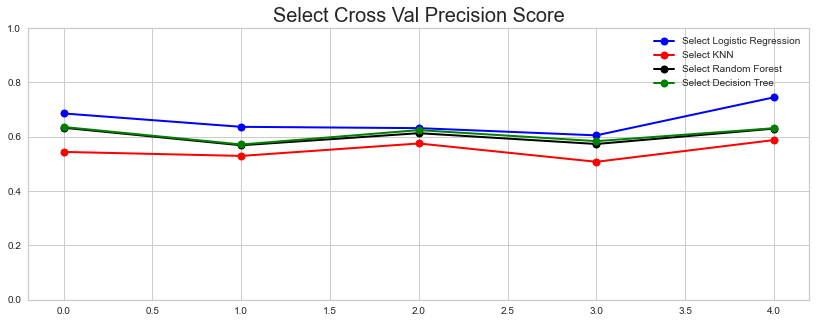

In [299]:
# multiple line plots
plt.figure(figsize=(14,5))
plt.plot( cv_select_df['Select Logistic Regression'], marker='o', markerfacecolor='blue', markersize=8, color='blue', linewidth=2)
plt.plot( cv_select_df['Select KNN'], marker='o', markerfacecolor='red', markersize=8, color='red', linewidth=2)
plt.plot( cv_select_df['Select Random Forest'], marker='o', markerfacecolor='black', markersize=8, color='black', linewidth=2)
plt.plot( cv_select_df['Select Decision Tree'], marker='o', markerfacecolor='green', markersize=8, color='green', linewidth=2)
# show legend
plt.title('Select Cross Val Precision Score', size=20)
plt.legend(['Select Logistic Regression', 'Select KNN', 'Select Random Forest', 'Select Decision Tree'])
plt.ylim(0,1)
# show graph
plt.show()

In [300]:
metric_select = pd.DataFrame(index = ['Select Logistic Regression', 'Select KNN',
                                             'Select Random Forest',
                                             'Select Decision Tree']) 
f1 = []
prec = []
recall = []
acc = []

In [301]:
def evaluationMetrics(y_test, y_pred):
    f1.append(f1_score(y_test,y_pred))
    prec.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    acc.append(accuracy_score(y_test, y_pred))

In [302]:
evaluationMetrics(y_test, y_pred_logreg_select)
evaluationMetrics(y_test, y_pred_knn_select)
evaluationMetrics(y_test, y_pred_ranfor_select)
evaluationMetrics(y_test, y_pred_dtree_select)

In [303]:
metric_select['F1-Score'] = f1
metric_select['Recall'] = recall
metric_select['Precision'] = prec
metric_select['Accuracy'] = acc

In [304]:
metric_select

,F1-Score,Recall,Precision,Accuracy
Select Logistic Regression,0.321900,0.214789,0.642105,0.899203
Select KNN,0.363917,0.276995,0.530337,0.892143
Select Random Forest,0.344178,0.235915,0.636076,0.899856
Select Decision Tree,0.330998,0.221831,0.651724,0.900118


In [305]:
metric_default

,F1-Score,Recall,Precision,Accuracy
Logistic Regression,0.326389,0.220657,0.626667,0.898549
KNN,0.356358,0.266432,0.537915,0.892796
Random Forest,0.294020,0.207746,0.502841,0.888874
Decision Tree,0.271584,0.190141,0.475073,0.886390


### Insights
1. Overall selection feature does increase the precision score in every model that we ran
2. The highest score : Decision Tree > Random Forest > Logistic Regression > KNN
3. Significant increased score : Decision Tree > Random Forest > Logistic Regression > KNN
4. A selection feature does effectively increase a precision score in this data

<a id="1"></a>
<h1 style="color:White; background-color:#0b6b6e; font-size:250%; text-align:left; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">8. All Model Evaluation</h1>

In [306]:
all_model = pd.concat([metric_default, metric_poly, metric_smote, metric_rus, metric_select], axis=0)
all_model = all_model.reset_index()

In [307]:
type = ['Default', 'Default', 'Default', 'Default',
        'Polynomial', 'Polynomial', 'Polynomial', 'Polynomial',
        'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE',
        'RUS', 'RUS', 'RUS', 'RUS',
        'Selected', 'Selected', 'Selected', 'Selected']

In [314]:
all_model['type'] = type
all_model

,index,F1-Score,Recall,Precision,Accuracy,type
0,Logistic Regression,0.326389,0.220657,0.626667,0.898549,Default
1,KNN,0.356358,0.266432,0.537915,0.892796,Default
2,Random Forest,0.294020,0.207746,0.502841,0.888874,Default
3,Decision Tree,0.271584,0.190141,0.475073,0.886390,Default
4,Poly Logistic Regression,0.164948,0.093897,0.677966,0.894104,Polynomial
5,Poly KNN,0.347082,0.261737,0.515012,0.890312,Polynomial
6,Poly Random Forest,0.364029,0.296948,0.470260,0.884429,Polynomial
7,Poly Decision Tree,0.323032,0.325117,0.320973,0.848215,Polynomial
8,SMOTE Logistic Regression,0.452579,0.638498,0.350515,0.827951,SMOTE
9,SMOTE KNN,0.357143,0.563380,0.261438,0.774088,SMOTE


In [311]:
all_cv = pd.concat([cv_df_t, poly_cv_df_t, cv_smote_df_t, cv_rus_df_t, cv_select_df_t], axis=0)
all_cv = all_cv.reset_index()

In [312]:
all_cv['type'] = type
all_cv

,index,mean,std,type
0,Logistic Regression,0.650409,0.051074,Default
1,KNN,0.520095,0.031450,Default
2,Random Forest,0.516981,0.032263,Default
3,Decision Tree,0.471958,0.022879,Default
4,Poly Logistic Regression,0.624398,0.038883,Polynomial
5,Poly KNN,0.489759,0.016492,Polynomial
6,Poly Random Forest,0.467248,0.038254,Polynomial
7,Poly Decision Tree,0.294485,0.003598,Polynomial
8,SMOTE Logistic Regression,0.325980,0.016425,SMOTE
9,SMOTE KNN,0.247818,0.002849,SMOTE


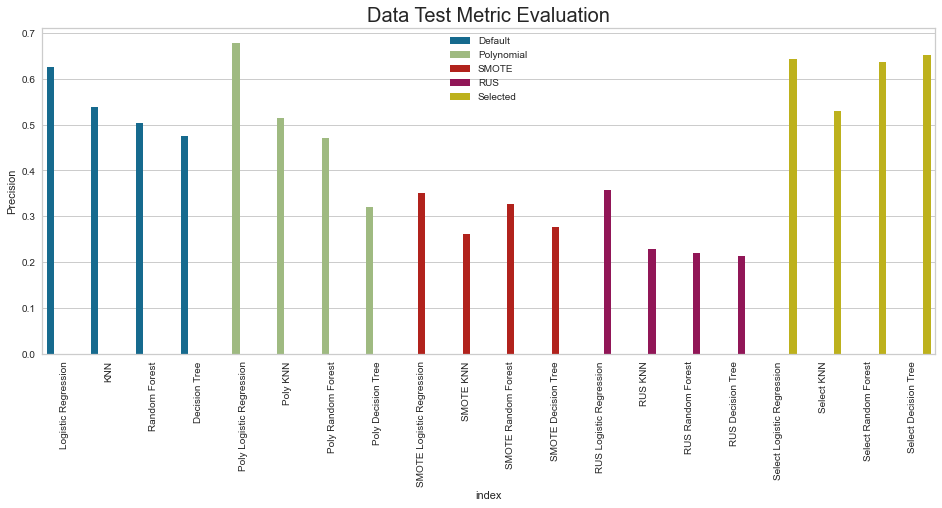

In [315]:
plt.figure(figsize=(16,6))
sns.barplot(x=all_model['index'], y=all_model['Precision'], hue=all_model['type'])
plt.xticks(rotation=90)
plt.title("Data Test Metric Evaluation", size=20)
plt.legend()
plt.show()

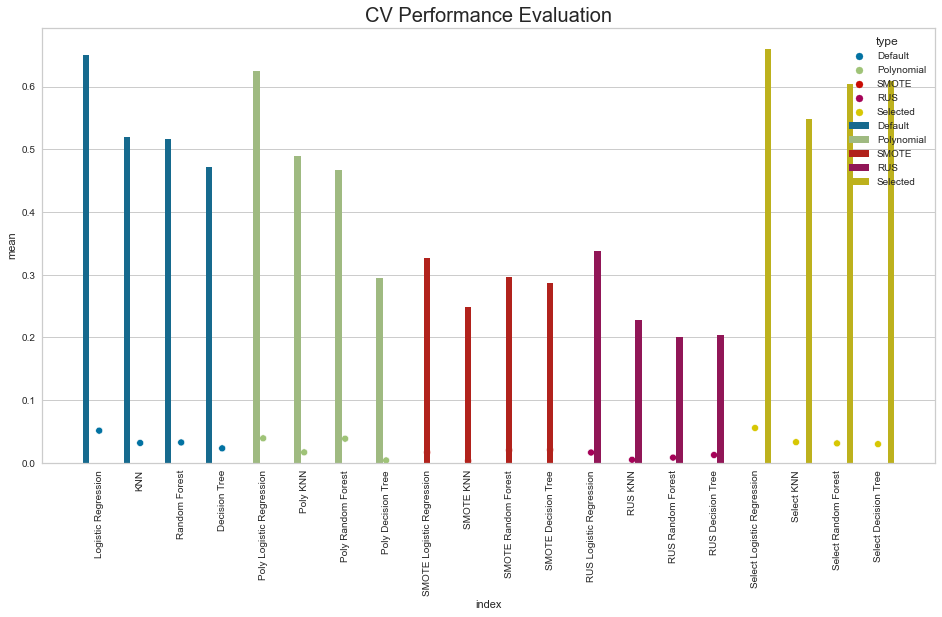

In [316]:
plt.figure(figsize=(16,8))
sns.barplot(x=all_cv['index'], y=all_cv['mean'], hue=all_model['type'])
sns.scatterplot(x=all_cv['index'], y=all_cv['std'], hue=all_model['type'])
plt.xticks(rotation=90)
plt.title("CV Performance Evaluation", size=20)
plt.show()

In [318]:
df_result = pd.merge(all_model, all_cv, on="index")
df_result = df_result.drop('type_x', axis=1)
df_result[['index','Precision', 'Recall', 'mean','std', 'type_y']].sort_values(by=['Precision'], ascending=False, ignore_index=True)

,index,Precision,Recall,mean,std,type_y
0,Poly Logistic Regression,0.677966,0.093897,0.624398,0.038883,Polynomial
1,Select Decision Tree,0.651724,0.221831,0.609324,0.029601,Selected
2,Select Logistic Regression,0.642105,0.214789,0.660690,0.055330,Selected
3,Select Random Forest,0.636076,0.235915,0.603504,0.030805,Selected
4,Logistic Regression,0.626667,0.220657,0.650409,0.051074,Default
5,KNN,0.537915,0.266432,0.520095,0.031450,Default
6,Select KNN,0.530337,0.276995,0.548833,0.032753,Selected
7,Poly KNN,0.515012,0.261737,0.489759,0.016492,Polynomial
8,Random Forest,0.502841,0.207746,0.516981,0.032263,Default
9,Decision Tree,0.475073,0.190141,0.471958,0.022879,Default


# Conclusions
1. Poly Logistic Regression has highest Precision score and stable performance
2. Select Decision Tree has second highest Precision score stable performance
3. Logistic Regression > Decision Tree > Random Forest are the top 5 model that has a hisghest precision score
4. For further modelling I only interested in Logistic, Decision Tree, and Random Forest with feature engineering that increase the score

- Logistic Regression = Polynomial - Selection Feature
- Decision Tree = Selection Feature
- Random Forest = Selectiion Feature

# 

# 

# 

# Behind the Scene

## Imbalanced

In [ ]:
logreg_nearmiss = Pipeline(steps=[('preprocessor_1_select', preprocessor_1),
                                ('balancing', NearMiss()),
                                ('logreg', LogisticRegression(random_state = 2020))])

knn_nearmiss = Pipeline(steps=[('preprocessor_1_select', preprocessor_1),
                             ('balancing', NearMiss()),
                             ('knn', KNeighborsClassifier())])

ranfor_nearmiss = Pipeline(steps=[('preprocessor_2_select', preprocessor_2),
                                ('balancing', NearMiss()),
                                ('ranfor', RandomForestClassifier(random_state = 2020))])

dtree_nearmiss = Pipeline(steps=[('preprocessor_2_select', preprocessor_2),
                               ('balancing', NearMiss()),
                               ('dtree', DecisionTreeClassifier(random_state = 2020))])

### Logistic Regression

In [ ]:
metric = 'precision'
def model_evaluation_cv(logreg_select, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(logreg_nearmiss, X_train, y_train, cv = skfold, scoring = metric)
  return model_cv

def print_result(model_cv):
  print('Logreg NearMiss CV Precision score',model_cv)
  print('Logreg NearMiss CV Precision score mean',model_cv.mean())
  print('Logreg NearMiss CV Precision score std',model_cv.std())

In [ ]:
logreg_nearmiss_model_cv = model_evaluation_cv(logreg_nearmiss, metric)
print_result(logreg_nearmiss_model_cv)

In [ ]:
logreg_nearmiss.fit(X_train, y_train)

In [ ]:
y_pred_logreg_nearmiss = logreg_nearmiss.predict(X_test)
print(classification_report(y_test, y_pred_logreg_nearmiss))

## RFE

In [ ]:
logreg_rfe = Pipeline(steps=[('preprocessor_1_select', preprocessor_1),
                                ('balancing', NearMiss()),
                                ('logreg', LogisticRegression(random_state = 2020))])

knn_rfe = Pipeline(steps=[('preprocessor_1_select', preprocessor_1),
                             ('rfe', RFE(estimator=KNeighborsClassifier(), n_features_to_select=5)),
                             ('knn', KNeighborsClassifier())])

ranfor_rfe = Pipeline(steps=[('preprocessor_2_select', preprocessor_2),
                                ('rfe', RFE(estimator=RandomForestClassifier(), n_features_to_select=5)),
                                ('ranfor', RandomForestClassifier())])

dtree_rfe = Pipeline(steps=[('preprocessor_2_select', preprocessor_2),
                            ('rfe', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)),
                            ('dtree', DecisionTreeClassifier(random_state = 2020))])

### Random Forest

In [ ]:
metric = 'precision'
def model_evaluation_cv(ranfor_rfe, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(ranfor_rfe, X_train, y_train, cv = skfold, scoring = metric)
  return model_cv

def print_result(model_cv):
  print('Ranfor RFE CV Precision score',model_cv)
  print('Ranfor RFE CV Precision score mean',model_cv.mean())
  print('Ranfor RFE CV Precision score std',model_cv.std())

In [ ]:
ranfor_rfe_model_cv = model_evaluation_cv(ranfor_rfe, metric)
print_result(ranfor_rfe_model_cv)

In [ ]:
ranfor_rfe.fit(X_train, y_train)

In [ ]:
y_pred_ranfor_rfe = ranfor_rfe.predict(X_test)
print(classification_report(y_test, y_pred_ranfor_rfe))

### Decision Tree

In [ ]:
metric = 'precision'
def model_evaluation_cv(dtree_rfe, metric):
  skfold = StratifiedKFold(n_splits = 5)
  model_cv = cross_val_score(dtree_rfe, X_train, y_train, cv = skfold, scoring = metric)
  return model_cv

def print_result(model_cv):
  print('DTree RFE CV Precision score',model_cv)
  print('DTree RFE CV Precision score mean',model_cv.mean())
  print('DTree RFE CV Precision score std',model_cv.std())

In [ ]:
dtree_rfe_model_cv = model_evaluation_cv(dtree_rfe, metric)
print_result(dtree_rfe_model_cv)

In [ ]:
dtree_rfe.fit(X_train, y_train)

In [ ]:
y_pred_dtree_rfe = dtree_rfe.predict(X_test)
print(classification_report(y_test, y_pred_dtree_rfe))

In [ ]:
# Hyperparameter
hyperparam_space = {
    'dtree__criterion':['gini', 'entropy'],
    'dtree__splitter':['best', 'random'],
    'dtree__max_features':['auto', 'sqrt', 'log2', 'none'],
    'dtree__class_weight':['balanced', 'none'],
    'dtree__min_samples_split':[2,3,4,5],
    'dtree__max_depth':[3,5,7]
}

# Cross Validation
skfold = StratifiedKFold(n_splits=5)

# Searching with GridSearch - Cross Validation
dtree_rfe_grid_search = GridSearchCV(
    dtree_rfe,
    param_grid = hyperparam_space,
    cv = skfold,
    n_jobs=-1,
    scoring='precision'
)

In [ ]:
dtree_rfe_grid_search.fit(X_train, y_train)
print('DTree RFE Best Params:',dtree_rfe_grid_search.best_params_)
print('DTree RFE Best Score:',dtree_rfe_grid_search.best_score_)

In [ ]:
dtree_rfe_tuned = Pipeline(steps=[('preprocessor_2', preprocessor_2),
                                ('rfe', RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)),
                                ('dtree', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_features='auto', min_samples_split=2, splitter='random', max_depth=3))])

dtree_rfe_tuned.fit(X_train, y_train)

In [ ]:
y_pred_dtree_select_tuned = dtree_select_tuned.predict(X_test)
print(classification_report(y_test, y_pred_dtree_select_tuned))